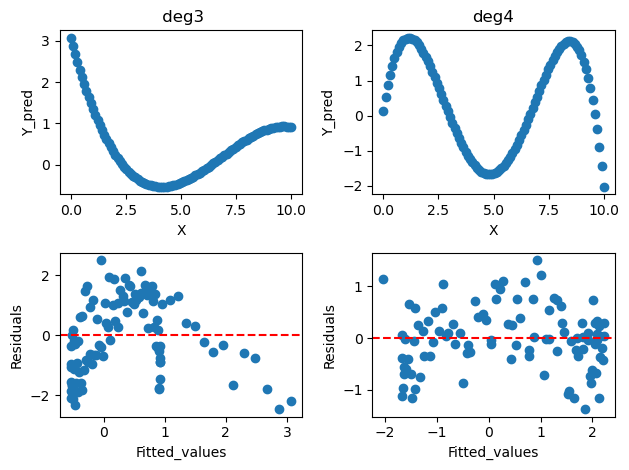

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate non-linear data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])

# Fit a polynomial regression model (non-linear)
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X)
model3 = LinearRegression().fit(X_poly3, y)
y_pred3 = model3.predict(X_poly3)

# Calculate residuals
residuals3 = y - y_pred3
plt.subplot(2,2,1)
plt.scatter(X, y_pred3)
plt.xlabel("X")
plt.ylabel("Y_pred")
plt.title(" deg3")
# Plot residuals
plt.subplot(2, 2, 3)
plt.scatter(y_pred3, residuals3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted_values")
plt.ylabel("Residuals")


poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X)
model4 = LinearRegression().fit(X_poly4, y)
y_pred4 = model4.predict(X_poly4)
plt.subplot(2,2,2)
plt.scatter(X, y_pred4)
plt.xlabel("X")
plt.ylabel("Y_pred")
plt.title("deg4")
# Calculate residuals
residuals4 = y - y_pred4
plt.subplot(2,2,4)
plt.scatter(y_pred4, residuals4)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted_values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

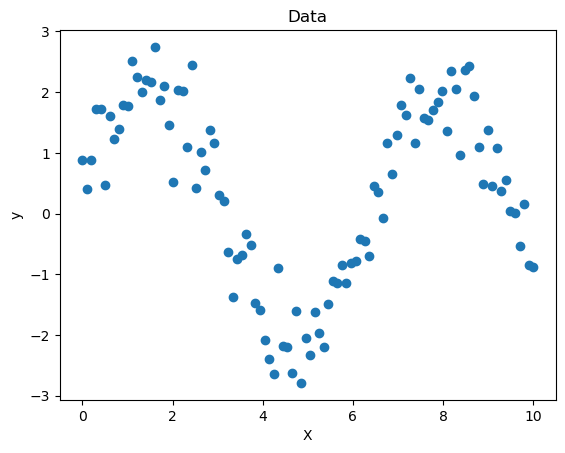

In [10]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Data")
plt.show()

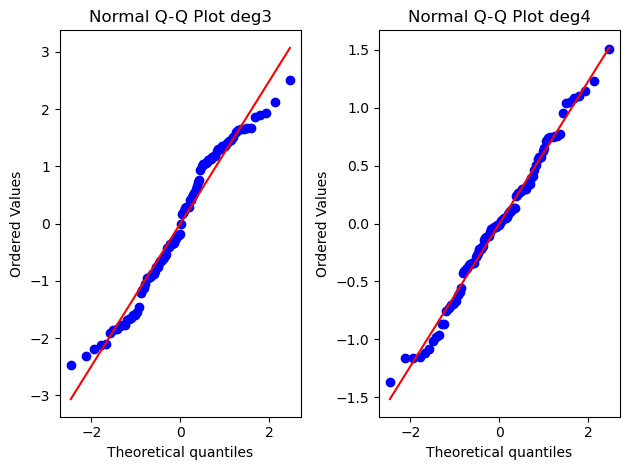

In [19]:
import scipy.stats as stats
plt.subplot(1,2,1)
stats.probplot(residuals3, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot deg3")
plt.subplot(1,2,2)
stats.probplot(residuals4, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot deg4")
plt.tight_layout()
plt.show()


In [20]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

X_with_constant3 = sm.add_constant(X_poly3)
test3 = het_breuschpagan(residuals3, X_with_constant3)
print('Breusch-Pagan test3:', test3)
if test3[1] > 0.05:
    print("Homo")
else:
    print("Hetero")
    
X_with_constant4 = sm.add_constant(X_poly4)
test4 = het_breuschpagan(residuals4, X_with_constant4)
print('Breusch-Pagan test4:', test4)
if test4[1] > 0.05:
    print("Homo")
else:
    print("Hetero")

Breusch-Pagan test3: (3.2341305943161203, 0.3569161575355085, 1.0695111784118059, 0.36580021913991906)
Homo
Breusch-Pagan test4: (2.5716394883570137, 0.6318551943320468, 0.6268856165467376, 0.6444781182517643)
Homo


In [21]:
from statsmodels.stats.stattools import durbin_watson
print('Durbin-Watson for deg3:', durbin_watson(residuals3))
print('Durbin-Watson for deg4:', durbin_watson(residuals4))

Durbin-Watson for deg3: 0.3166597044257527
Durbin-Watson for deg4: 1.2883315110696696


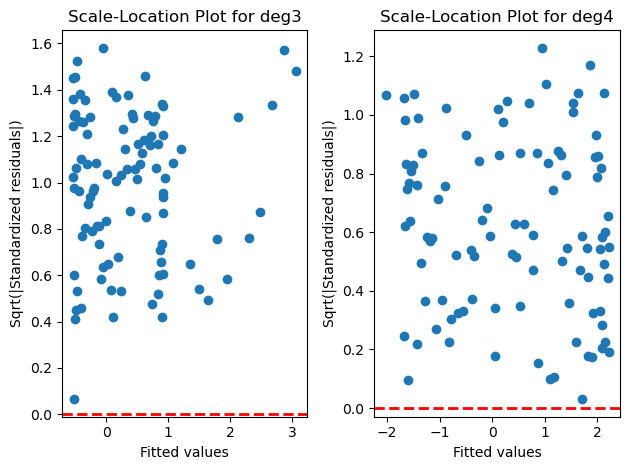

In [22]:
plt.subplot(1,2,1)
plt.scatter(y_pred3, np.sqrt(np.abs(residuals3)))
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Standardized residuals|)')
plt.title('Scale-Location Plot for deg3')
plt.subplot(1,2,2)
plt.scatter(y_pred4, np.sqrt(np.abs(residuals4)))
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Standardized residuals|)')
plt.title('Scale-Location Plot for deg4')
plt.tight_layout()
plt.show()